# Librerias

In [3]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.8 MB/s eta 0:00:00


In [1]:
pip install kmodes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv
import joblib
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from joblib import dump, load
#import shap
#from shap import datasets, KernelExplainer, force_plot, initjs

# Lectura de datos

In [3]:
# Cargar el archivo CSV
df = pd.read_csv('ObesityTrain.csv')

# Mostrar las primeras filas del dataframe
print(df.head())

   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   family_history_with_overweight  20758 non-null  object 
 4   FAVC                            20758 non-null  object 
 5   FCVC                            20758 non-null  float64
 6   NCP                             20758 non-null  float64
 7   CAEC                            20758 non-null  object 
 8   SMOKE                           20758 non-null  object 
 9   CH2O                            20758 non-null  float64
 10  SCC                             20758 non-null  object 
 11  FAF                             20758 non-null  float64
 12  TUE                             

In [7]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
# Seleccionar automáticamente las variables numéricas y categóricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df.select_dtypes(include=[object]).columns.tolist()
df = df.drop(columns="id")
df=df.drop(columns="Weight")

# Eliminar la variable de respuesta
df_1 = df.drop(columns=columnas_categoricas)
df_2 = df.drop(columns="NObeyesdad")

# EDA

## PCA

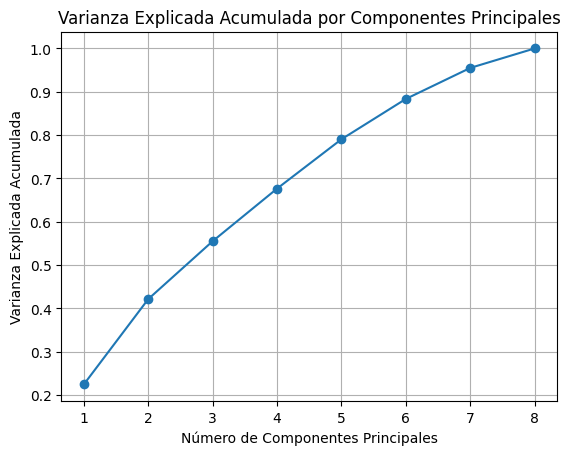

Componente Principal 1: 0.22
Componente Principal 2: 0.20
Componente Principal 3: 0.13
Componente Principal 4: 0.12
Componente Principal 5: 0.11
Componente Principal 6: 0.09
Componente Principal 7: 0.07
Componente Principal 8: 0.04


In [44]:
# Escalar los datos
scaler = StandardScaler()
df_escalado = scaler.fit_transform(df_1)

# Aplicar PCA
pca = PCA()
pca.fit(df_escalado)

# Calcular la varianza explicada por cada componente principal adicional
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada por cada componente principal adicional
for i, evr in enumerate(explained_variance_ratio):
    print(f'Componente Principal {i+1}: {evr:.2f}')


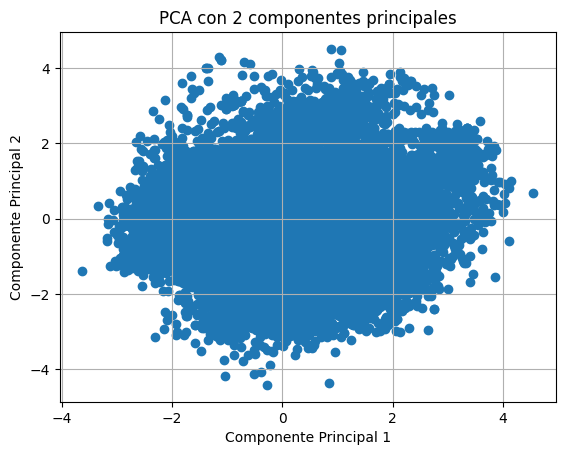

In [45]:
# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_escalado)

# Graficar el resultado en 2D
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA con 2 componentes principales')
plt.grid(True)
plt.show()


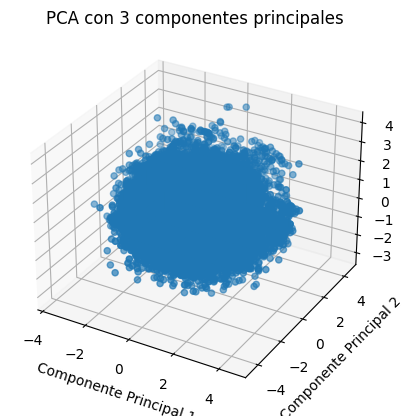

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_escalado)

# Graficar el resultado en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraer los componentes principales
pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]
pc3 = pca_result[:, 2]

# Graficar los datos en el espacio tridimensional
ax.scatter(pc1, pc2, pc3)

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Título del gráfico
plt.title('PCA con 3 componentes principales')

# Mostrar el gráfico
plt.show()


## Clustering

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 160196.00000000006
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2842, ncost: 141568.28587412712
Run: 1, iteration: 2/100, moves: 1125, ncost: 141099.23364277885
Run: 1, iteration: 3/100, moves: 1091, ncost: 139417.2384051012
Run: 1, iteration: 4/100, moves: 2328, ncost: 137609.5800441353
Run: 1, iteration: 5/100, moves: 1626, ncost: 136422.0781467819
Run: 1, iteration: 6/100, moves: 1139, ncost: 135835.54525817916
Run: 1, iteration: 7/100, moves: 716, ncost: 135602.02051366732
Run: 1, iteration: 8/100, moves: 356, ncost: 135538.18275265794
Run: 1, iteration: 9/100, moves: 179, ncost: 135523.87078583377
Run: 1, iteration: 10/100, moves: 81, ncost: 13

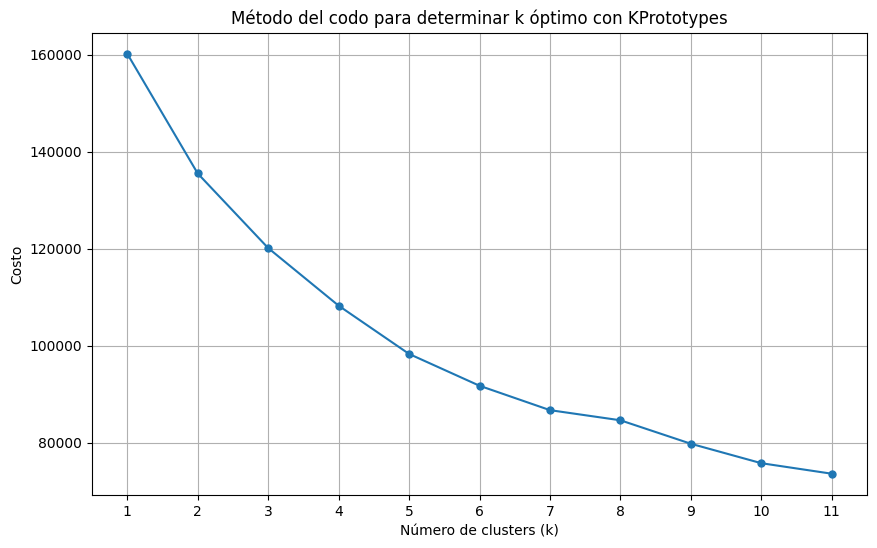

In [5]:
# Identifica las columnas numéricas y categóricas en 'df_2'.
columnas_numericas = df_2.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df_2.select_dtypes(exclude=[np.number]).columns.tolist()

# Estandariza las variables numéricas de 'df_2'.
scaler = StandardScaler()
df_2[columnas_numericas] = scaler.fit_transform(df_2[columnas_numericas])

# Prepara el DataFrame 'df_2' para KPrototypes convirtiendo variables categóricas a códigos.
df_kproto = df_2.copy()
for col in columnas_categoricas:
    df_kproto[col] = df_kproto[col].astype('category').cat.codes

# Convierte el DataFrame 'df_kproto' a un array de NumPy para KPrototypes.
df_array = df_kproto.values

# Índices de las columnas categóricas en el array de NumPy, ajustado tras la estandarización.
indices_categoricos = [df_kproto.columns.get_loc(col) for col in columnas_categoricas]

costos = []
for k in range(1, 12):
    kprototype = KPrototypes(n_clusters=k, init='Cao', n_init=1, verbose=2)
    clusters = kprototype.fit_predict(df_array, categorical=indices_categoricos)
    costos.append(kprototype.cost_)

# Grafica la técnica del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), costos, marker='o', linestyle='-', markersize=5)
plt.title('Método del codo para determinar k óptimo con KPrototypes')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Costo')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()



In [6]:
# Identifica las columnas numéricas y categóricas en 'df_2'.
columnas_numericas = df_2.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df_2.select_dtypes(exclude=[np.number]).columns.tolist()

# Estandariza las variables numéricas de 'df_2'.
scaler = StandardScaler()
df_2[columnas_numericas] = scaler.fit_transform(df_2[columnas_numericas])

# Prepara el DataFrame 'df_2' para KPrototypes convirtiendo variables categóricas a códigos.
df_kproto = df_2.copy()
for col in columnas_categoricas:
    df_kproto[col] = df_kproto[col].astype('category').cat.codes

# Convierte el DataFrame 'df_kproto' a un array de NumPy para KPrototypes.
data_array = df_kproto.values

# Índices de las columnas categóricas en el array de NumPy, ajustado tras la estandarización.
indices_categoricos = [df_kproto.columns.get_loc(col) for col in columnas_categoricas]

# Índices de las columnas categóricas en el array de NumPy, para KPrototypes
#indices_categoricos = [df.columns.get_loc(col) for col in columnas_categoricas]

# Inicializa KPrototypes con una semilla para reproducibilidad
kproto = KPrototypes(n_clusters=7, init='Cao', n_init=1, verbose=2, random_state=42)

# Ajusta el modelo a tus datos
clusters = kproto.fit_predict(data_array, categorical=indices_categoricos)

# Ahora, 'clusters' contiene las asignaciones de cluster para cada punto de datos


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8194, ncost: 93858.01627827641
Run: 1, iteration: 2/100, moves: 2742, ncost: 92034.59114577441
Run: 1, iteration: 3/100, moves: 2311, ncost: 89700.98322791641
Run: 1, iteration: 4/100, moves: 2473, ncost: 87410.52293774083
Run: 1, iteration: 5/100, moves: 1247, ncost: 86890.59638403
Run: 1, iteration: 6/100, moves: 629, ncost: 86730.89585276767
Run: 1, iteration: 7/100, moves: 428, ncost: 86623.1916705407
Run: 1, iteration: 8/100, moves: 392, ncost: 86548.88625128112
Run: 1, iteration: 9/100, moves: 354, ncost: 86488.25602270219
Run: 1, iteration: 10/100, moves: 277, ncost: 86456.1609414502
Run: 1, iteration: 11/100, moves: 208, ncost: 86439.42316979101
Run: 1, iteration: 12/100, moves: 128, ncost: 86432.16584136421
Run: 1, iteration: 13/100, moves: 131, ncost: 86420.64012815565
Run: 1, iteration: 14

In [38]:
dump(kproto, 'kproto_model_1.joblib')

['kproto_model_1.joblib']

In [28]:
df_cluster = df.copy()
df_cluster['Cluster'] = clusters

In [8]:
df_cluster.groupby("Cluster").mean()

<ipython-input-8-4e18469aa83e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cluster.groupby("Cluster").mean()


,Age,Height,FCVC,NCP,CH2O,FAF,TUE
Cluster,,,,,,,
0,37.719559,1.658800,2.315883,2.611739,1.690394,0.759842,0.157258
1,21.971140,1.647126,2.267914,1.083726,1.876465,0.836974,0.598504
2,25.305129,1.644289,2.951275,2.998335,2.587591,0.116604,0.358839
3,25.424170,1.789367,2.275543,2.927585,2.176436,1.271445,0.169566
4,21.076576,1.726534,1.951102,3.034730,2.023892,1.071629,1.301436
5,21.882947,1.628886,2.599109,3.037137,1.355688,0.717686,0.512982
6,20.706442,1.736105,2.938050,3.081865,2.318391,1.735960,0.802050


In [30]:
df_cluster.to_csv('ObesityCluster.csv', index=False)

# Modelos

## Sin cluster

In [6]:
X = df.drop(columns="NObeyesdad")
y = df['NObeyesdad']

In [7]:
target_mapping = {
                  'Insufficient_Weight':0,
                  'Normal_Weight':1,
                  'Overweight_Level_I':2,
                  'Overweight_Level_II':3,
                  'Obesity_Type_I':4,
                  'Obesity_Type_II':5 ,
                  'Obesity_Type_III':6
                  }
y = y.map(target_mapping)

In [8]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Identifica las columnas numéricas y categóricas
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns

In [8]:
for columna in columnas_categoricas:
    X[columna] = X[columna].astype('category')

### Random Forest

In [19]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__ccp_alpha': [0.0, 0.01, 0.1, 0.2]
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_rf.best_params_)
print("Mejor puntuación:", grid_search_rf.best_score_)

Mejores parámetros: {'classifier__ccp_alpha': 0.0, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Mejor puntuación: 0.7318909278495678


In [20]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_rf = grid_search_rf.predict(X_test)

# Calcular métricas
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

### LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__fit_intercept': [True, False],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter': [50, 100, 200, 500]
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_lr = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_lr.best_params_)
print("Mejor puntuación:", grid_search_lr.best_score_)

Mejores parámetros: {'classifier__C': 100, 'classifier__fit_intercept': True, 'classifier__max_iter': 500, 'classifier__solver': 'lbfgs'}
Mejor puntuación: 0.5947701353021946


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_lr = grid_search_lr.predict(X_test)

# Calcular métricas
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

### XGBoost

In [10]:
from xgboost import XGBClassifier

In [25]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, enable_categorical=True)
)
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_xb = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_xb.fit(X_train, y_train)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_xb.best_params_)
print("Mejor puntuación:", grid_search_xb.best_score_)

Mejores parámetros: {'classifier__gamma': 0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 150}
Mejor puntuación: 0.7569866642035011


In [12]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_xb = grid_search_xb.predict(X_test)

# Calcular métricas
xb_accuracy = accuracy_score(y_test, y_pred_xb)
xb_precision = precision_score(y_test, y_pred_xb, average='weighted')
xb_recall = recall_score(y_test, y_pred_xb, average='weighted')
xb_f1 = f1_score(y_test, y_pred_xb, average='weighted')

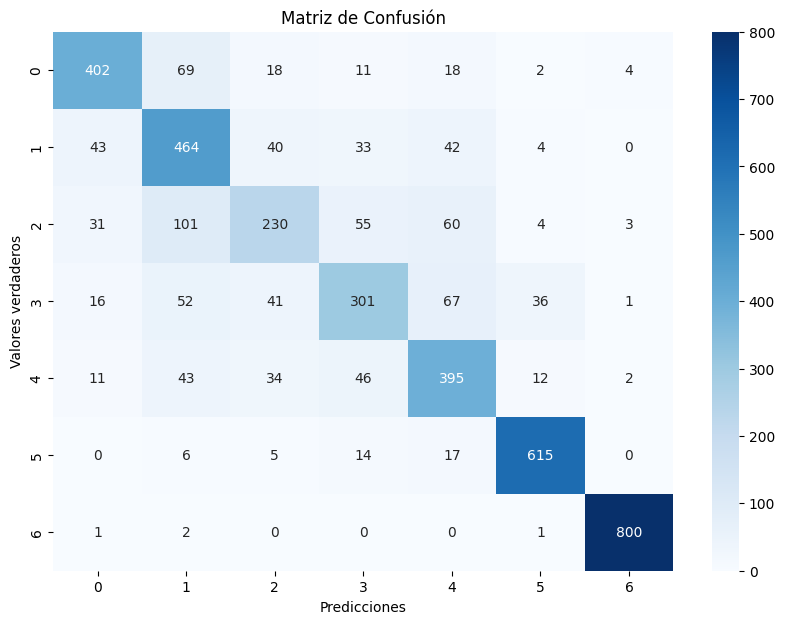

In [16]:
# Generar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred_xb)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid_search_xb.classes_, yticklabels=grid_search_xb.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

### LIGHTGBM

In [16]:
from lightgbm import LGBMClassifier

In [28]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42)
)
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__num_leaves': [30, 50],
    'classifier__max_depth': [5, 10],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [50, 100],
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_lg = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_lg.fit(X_train, y_train)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_lg.best_params_)
print("Mejor puntuación:", grid_search_lg.best_score_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1786
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 29
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
Mejores parámetros: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'classifier__num_leaves': 30}
Mejor puntuación: 0.7557327151507767


In [29]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_lg = grid_search_lg.predict(X_test)

# Calcular métricas
lb_accuracy = accuracy_score(y_test, y_pred_lg)
lb_precision = precision_score(y_test, y_pred_lg, average='weighted')
lb_recall = recall_score(y_test, y_pred_lg, average='weighted')
lb_f1 = f1_score(y_test, y_pred_lg, average='weighted')


### MLP

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(max_iter=1000, random_state=42)
)
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__alpha': [0.1, 0.01],
    'classifier__hidden_layer_sizes': [(10,), (100,)],
    'classifier__activation': ['logistic'],
    'classifier__learning_rate': ['constant']}


balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_mlp = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_mlp.fit(X_train, y_train)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_mlp.best_params_)
print("Mejor puntuación:", grid_search_mlp.best_score_)

Mejores parámetros: {'classifier__activation': 'logistic', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (100,), 'classifier__learning_rate': 'constant'}
Mejor puntuación: 0.7047467712242371


In [32]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_mlp = grid_search_mlp.predict(X_test)

# Calcular métricas
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp, average='weighted')
mlp_recall = recall_score(y_test, y_pred_mlp, average='weighted')
mlp_f1 = f1_score(y_test, y_pred_mlp, average='weighted')

### Metricas

In [33]:
data = {
    'modelos': ['random forest', 'xgboost', 'mlp', 'lgb', 'log', ],
    'accuracy': [rf_accuracy, xb_accuracy, mlp_accuracy, lb_accuracy, lr_accuracy],
    'precision': [rf_precision, xb_precision, mlp_precision, lb_precision, lr_precision],
    'recall': [rf_recall, xb_recall, mlp_recall, lb_recall, lr_recall],
    'f1': [ rf_f1, xb_f1,  mlp_f1,lb_f1, lr_f1],
}

# Crear el DataFrame
metricas = pd.DataFrame(data)
print(metricas)

         modelos  accuracy  precision    recall        f1
0  random forest  0.754094   0.752098  0.754094  0.750176
1        xgboost  0.772399   0.771324  0.772399  0.769470
2            mlp  0.715318   0.710413  0.715318  0.711673
3            lgb  0.770472   0.768087  0.770472  0.767553
4            log  0.637283   0.625177  0.637283  0.616462


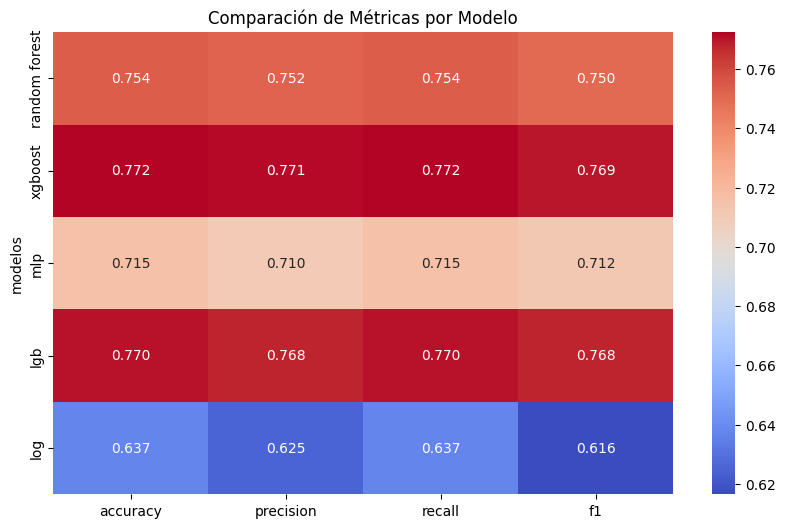

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
# Configurar el índice como 'modelos' para que aparezca en el eje y del heatmap
metricas.set_index('modelos', inplace=True)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metricas, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Comparación de Métricas por Modelo')
plt.show()

In [94]:
mejor = XGBClassifier(gamma=0,learning_rate=0.2,max_depth=5,min_child_weight=3,n_estimators=150,random_state=42, enable_categorical=True)

In [95]:
mejor.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
dump(mejor, 'mejor_normal.joblib')

['mejor_normal.joblib']

### Shape

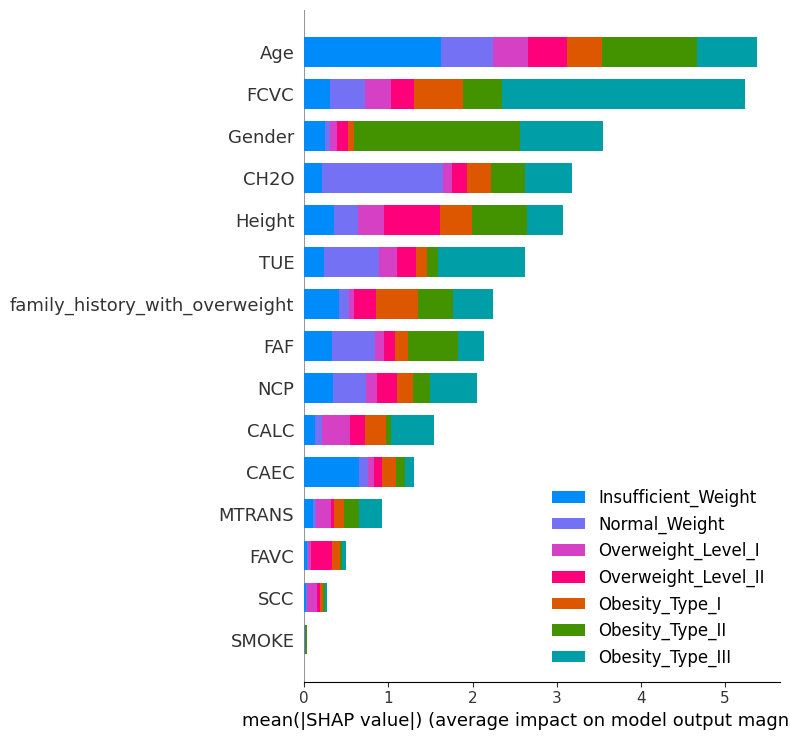

In [76]:
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar",class_names={0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I',3:'Overweight_Level_II',4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'},
 class_inds='original')

Clase Obesity_Type_III


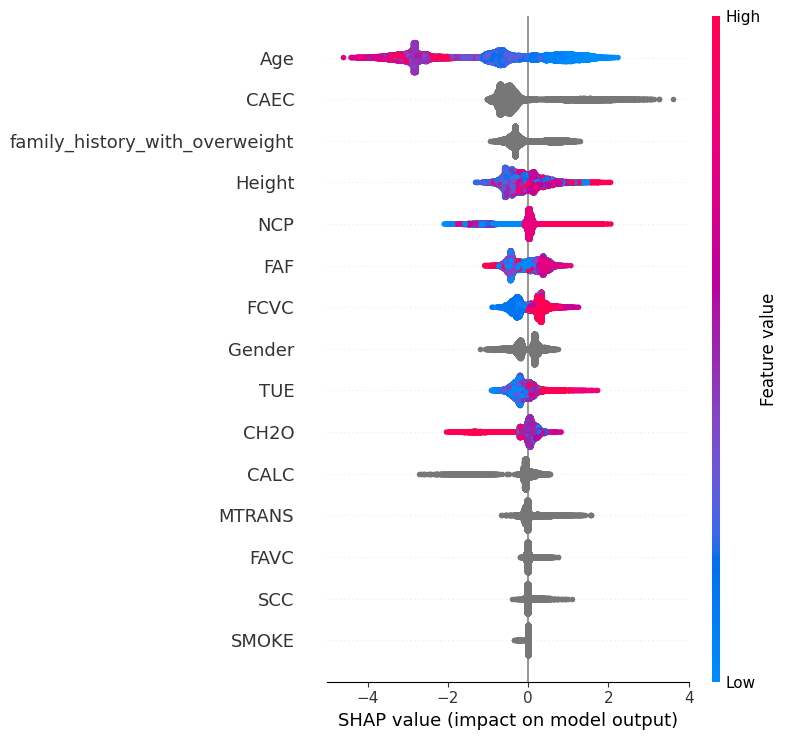

In [77]:
# Visualizar el resumen de SHAP values para la primera clase
print(f"Clase Obesity_Type_III")
shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)

In [1]:
shap_interaction_values = explainer.shap_interaction_values(X)


NameError: name 'explainer' is not defined

In [ ]:
shap.summary_plot(shap_interaction_values, X.iloc[:2000,:])

In [67]:
shap.initjs()
i=8
shap.force_plot(explainer.expected_value[6], shap_values[6][i], X.values[i], feature_names = X.columns)

IndexError: index 8 is out of bounds for axis 0 with size 1

In [49]:
# Cargar el archivo CSV
df_test = pd.read_csv('ObesityTest.csv')

X_predict=df_test.head(1)
X_predict=X_predict.drop(columns='id')
X_predict=X_predict.drop(columns='Weight')

In [17]:
modelo=joblib.load('mejor_normal.joblib')

In [48]:
X_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          1 non-null      category
 1   Age                             1 non-null      float64 
 2   Height                          1 non-null      float64 
 3   family_history_with_overweight  1 non-null      category
 4   FAVC                            1 non-null      category
 5   FCVC                            1 non-null      float64 
 6   NCP                             1 non-null      float64 
 7   CAEC                            1 non-null      category
 8   SMOKE                           1 non-null      category
 9   CH2O                            1 non-null      float64 
 10  SCC                             1 non-null      category
 11  FAF                             1 non-null      float64 
 12  TUE                       

In [52]:
for columna in columnas_categoricas:
    X_predict[columna] = X_predict[columna].astype('category')

In [56]:
shap.initjs()
explainer = shap.TreeExplainer(modelo)
pred = modelo.predict(X_predict)
shap_values = explainer.shap_values(X_predict)
# Mapeo de índices a nombres de clases
class_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

# Obtiene el nombre de la clase predicha
predicted_class_name = class_mapping[pred[0]]

# Imprime el nombre de la clase predicha como un título
print(f"Clase predicha: {predicted_class_name}")

# Luego muestra el gráfico SHAP
shap.force_plot(explainer.expected_value[pred[0]], shap_values[pred[0]][0], X_predict.values[0], feature_names=X_predict.columns)


Clase predicha: Overweight_Level_I


In [57]:
shap.initjs()
explainer = shap.TreeExplainer(modelo)
pred = modelo.predict(X_predict)
shap_values = explainer.shap_values(X_predict)
shap.force_plot(explainer.expected_value[pred[0]], shap_values[pred[0]][0], X_predict.values[0], feature_names = X_predict.columns)

Clase: Insufficient_Weight


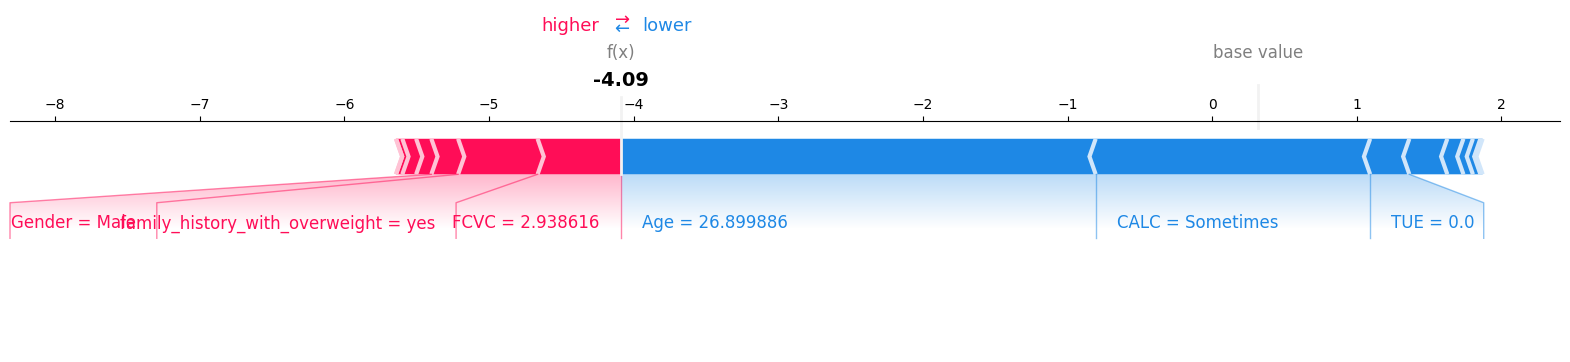

Clase: Normal_Weight


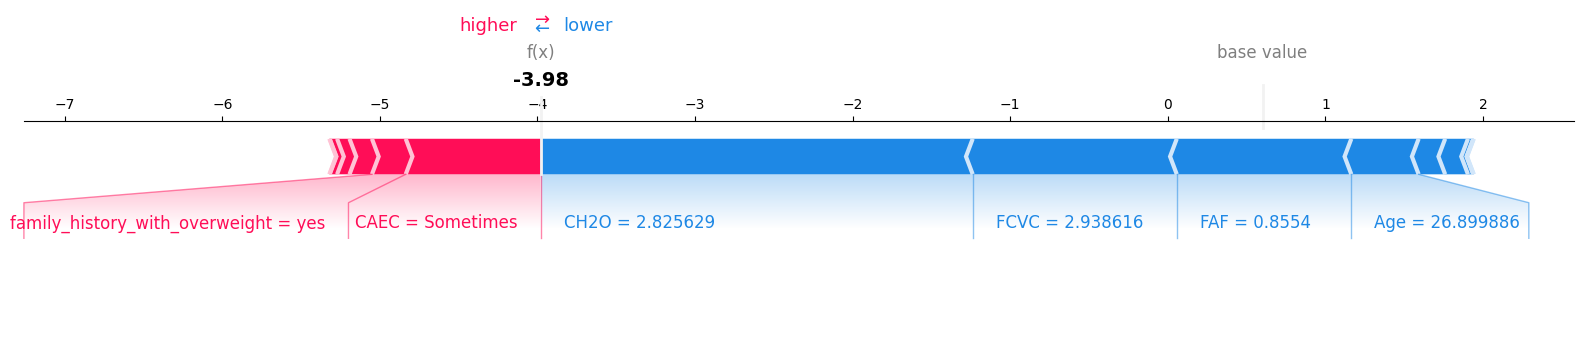

Clase: Overweight_Level_I


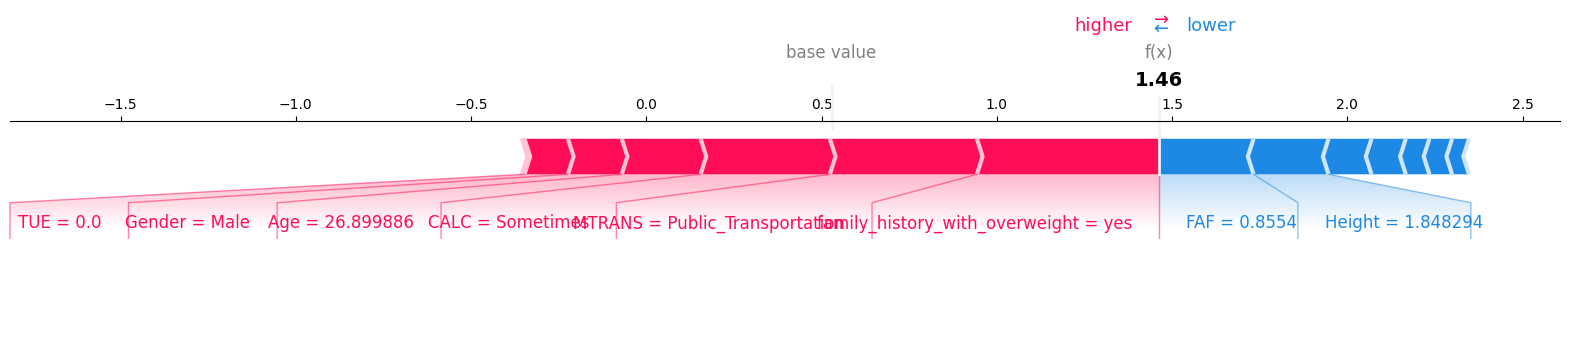

Clase: Overweight_Level_II


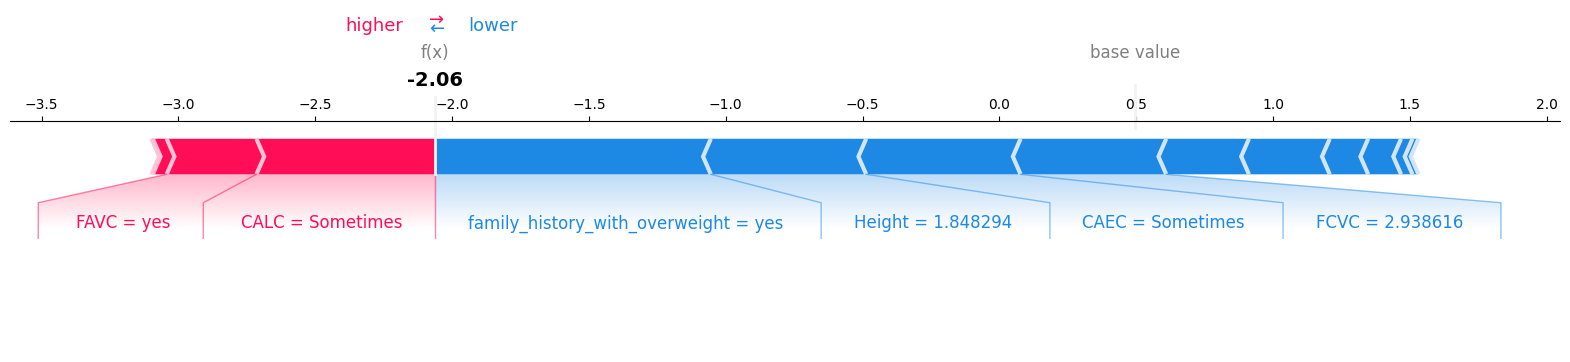

Clase: Obesity_Type_I


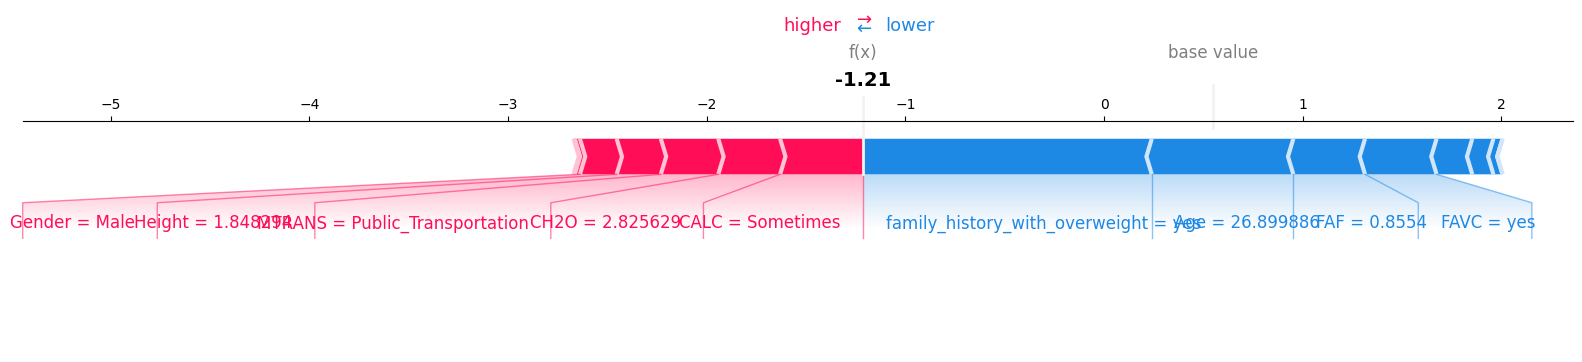

Clase: Obesity_Type_II


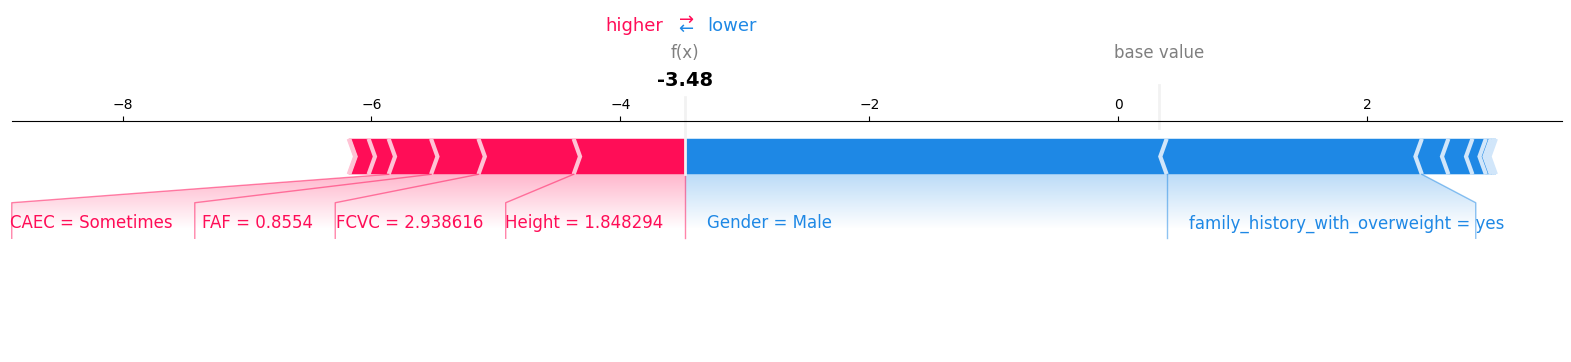

Clase: Obesity_Type_III


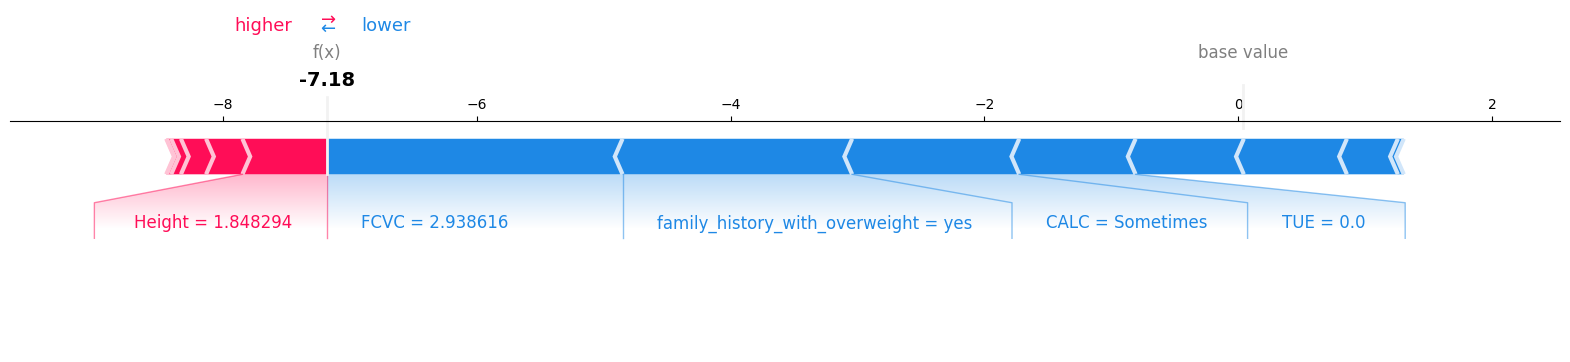

In [59]:
import shap

# Mapeo de índices a nombres de clases
class_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

# Inicializa las bibliotecas de JavaScript de SHAP (asegúrate de que esto se ejecute una sola vez)
shap.initjs()

# i es el índice de la instancia específica que quieres explicar
i = 0

# Iterar sobre cada clase
for clase_idx in range(7):  # Ajuste aquí para incluir hasta 'Obesity_Type_III'
    # Imprime el nombre de la clase predicha como un título
    print(f"Clase: {class_mapping[clase_idx]}")

    # Genera el plot de fuerza para la instancia i y la clase actual
    shap_plot = shap.force_plot(
        explainer.expected_value[clase_idx],
        shap_values[clase_idx][i],
        X_predict.iloc[i],
        feature_names=X_predict.columns,
        matplotlib=True
    )




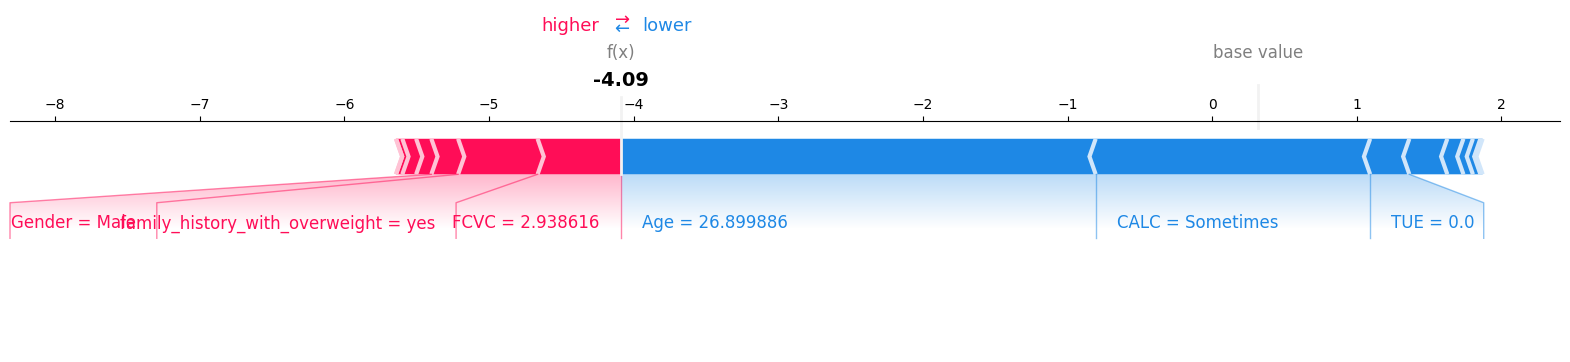

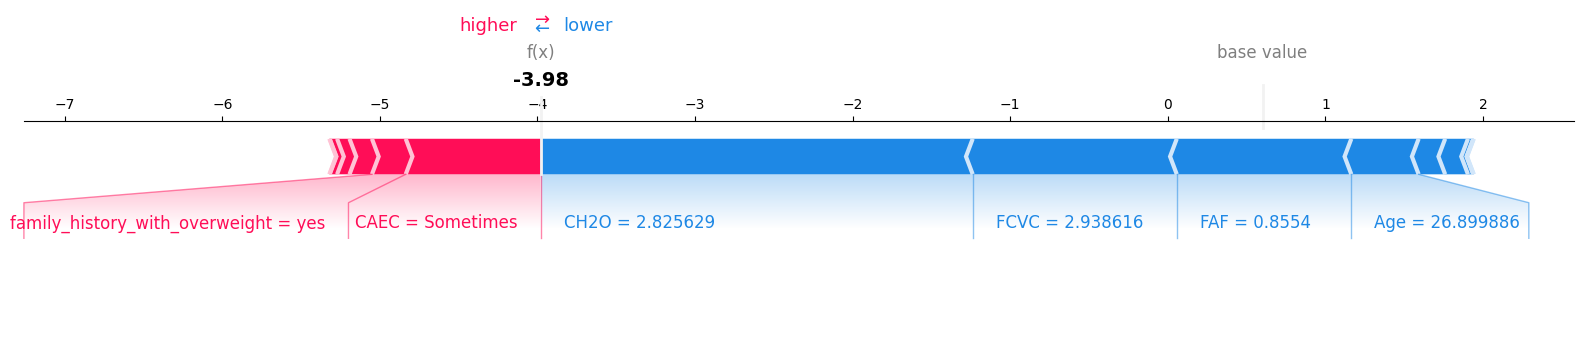

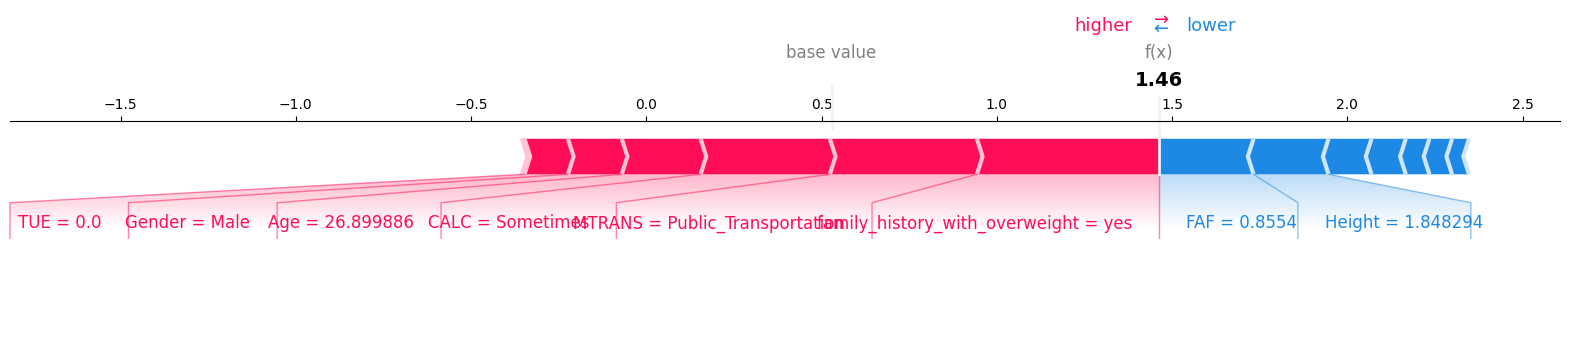

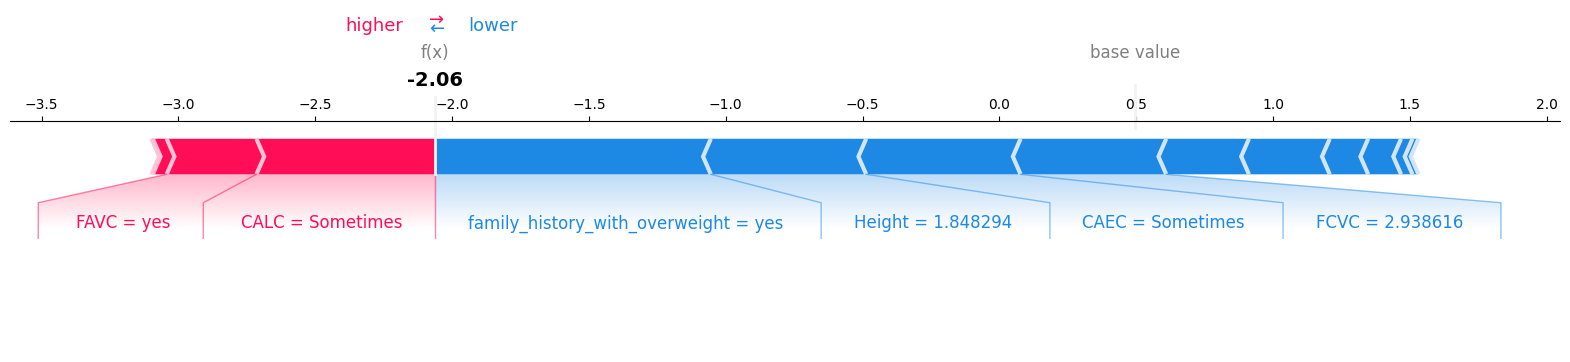

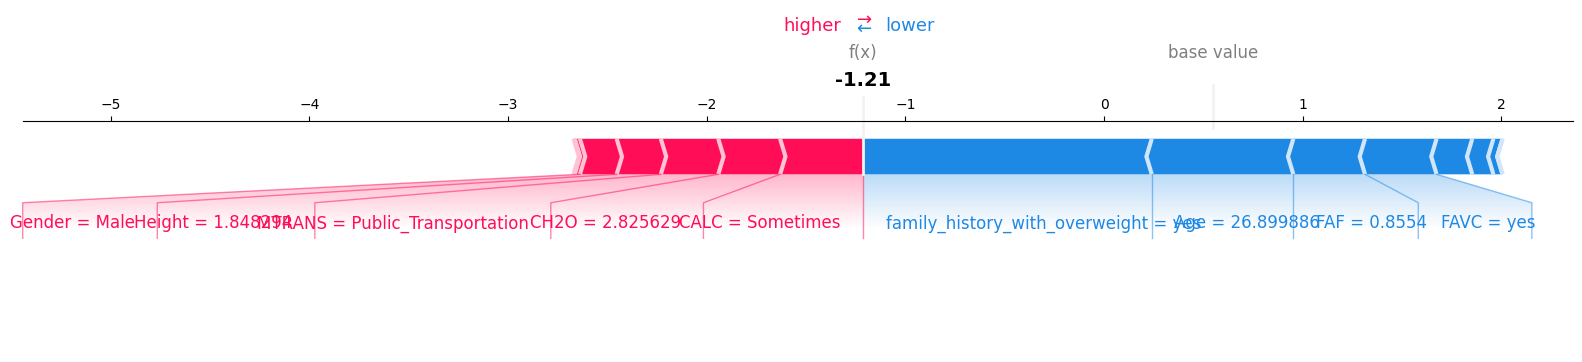

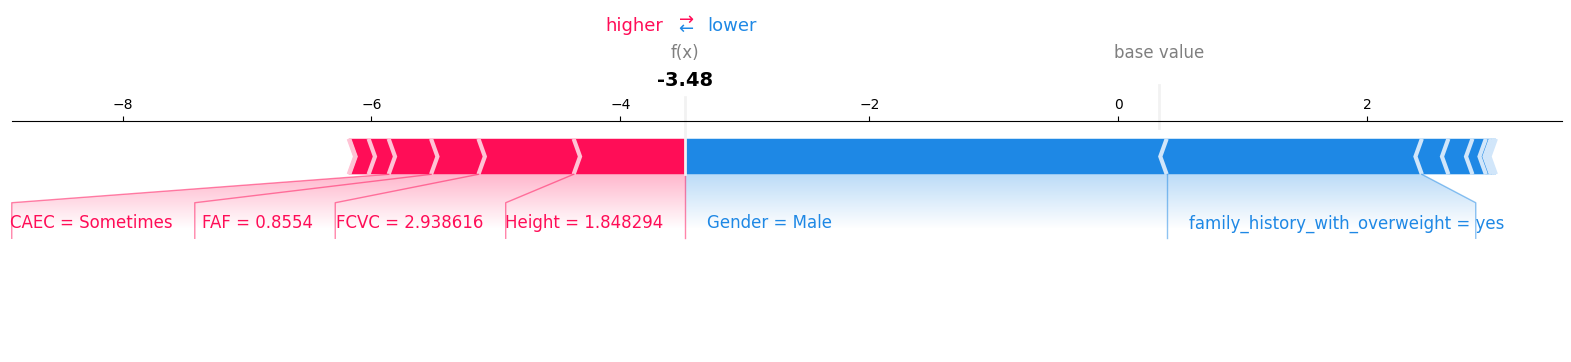

In [45]:

# Inicializa las bibliotecas de JavaScript de SHAP (asegúrate de que esto se ejecute una sola vez)
shap.initjs()

# i es el índice de la instancia específica que quieres explicar
i = 0

# Iterar sobre cada clase
for clase_idx in range(0,6):
    # Genera el plot de fuerza para la instancia i y la clase actual
    shap_plot = shap.force_plot(
        explainer.expected_value[clase_idx],
        shap_values[clase_idx][i],
        X_predict.iloc[i],
        feature_names=X_predict.columns,
        matplotlib=True
    )




## Con cluster

In [9]:
X_cluster = df_cluster.drop(columns="NObeyesdad")
y_cluster = df_cluster['NObeyesdad']

In [10]:
target_mapping = {
                  'Insufficient_Weight':0,
                  'Normal_Weight':1,
                  'Overweight_Level_I':2,
                  'Overweight_Level_II':3,
                  'Obesity_Type_I':4,
                  'Obesity_Type_II':5 ,
                  'Obesity_Type_III':6
                  }
y_cluster = y_cluster.map(target_mapping)

In [11]:
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

In [12]:
# Identifica las columnas numéricas y categóricas
columnas_numerica_cluster = X_cluster.select_dtypes(include=['int64', 'float64','uint16']).columns
columnas_categoricas_cluster = X_cluster.select_dtypes(include=['object', 'category']).columns

In [13]:
for columna in columnas_categoricas_cluster:
    X_cluster[columna] = X_cluster[columna].astype('category')

### Random Forest

In [36]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numerica_cluster),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas_cluster),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__ccp_alpha': [0.0, 0.01, 0.1, 0.2]
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_rf_cluster = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_rf_cluster.fit(X_train_cluster, y_train_cluster)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_rf_cluster.best_params_)
print("Mejor puntuación:", grid_search_rf_cluster.best_score_)

Mejores parámetros: {'classifier__ccp_alpha': 0.0, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Mejor puntuación: 0.7298261142416241


In [37]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_rf_cluster = grid_search_rf_cluster.predict(X_test_cluster)

# Calcular métricas
rf_accuracy_cluster = accuracy_score(y_test_cluster, y_pred_rf_cluster)
rf_precision_cluster = precision_score(y_test_cluster, y_pred_rf_cluster, average='weighted')
rf_recall_cluster = recall_score(y_test_cluster, y_pred_rf_cluster, average='weighted')
rf_f1_cluster = f1_score(y_test_cluster, y_pred_rf_cluster, average='weighted')

### LogisticRegression

In [41]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numerica_cluster),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas_cluster),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__fit_intercept': [True, False],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter': [50, 100, 200, 500]
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_lr_cluster = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_lr_cluster.fit(X_train_cluster, y_train_cluster)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_lr_cluster.best_params_)
print("Mejor puntuación:", grid_search_lr_cluster.best_score_)


Mejores parámetros: {'classifier__C': 10, 'classifier__fit_intercept': False, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}
Mejor puntuación: 0.5962775315870242


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_lr_cluster = grid_search_lr_cluster.predict(X_test_cluster)

# Calcular métricas
lr_accuracy_cluster = accuracy_score(y_test_cluster, y_pred_lr_cluster)
lr_precision_cluster = precision_score(y_test_cluster, y_pred_lr_cluster, average='weighted')
lr_recall_cluster = recall_score(y_test_cluster, y_pred_lr_cluster, average='weighted')
lr_f1_cluster = f1_score(y_test_cluster, y_pred_lr_cluster, average='weighted')

### XGBoost

In [43]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numerica_cluster),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas_cluster),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, enable_categorical=True)
)
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_xb_cluster = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_xb_cluster.fit(X_train_cluster, y_train_cluster)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_xb_cluster.best_params_)
print("Mejor puntuación:", grid_search_xb_cluster.best_score_)

Mejores parámetros: {'classifier__gamma': 0.1, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 150}
Mejor puntuación: 0.7569951332382205


In [27]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numerica_cluster),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas_cluster),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, enable_categorical=True)
)
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__n_estimators': [150],
    'classifier__learning_rate': [0.2],
    'classifier__max_depth': [5],
    'classifier__min_child_weight': [1],
    'classifier__gamma': [0],
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_xb_cluster = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_xb_cluster.fit(X_train_cluster, y_train_cluster)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_xb_cluster.best_params_)
print("Mejor puntuación:", grid_search_xb_cluster.best_score_)

Mejores parámetros: {'classifier__gamma': 0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 150}
Mejor puntuación: 0.7559033870032795


In [44]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_xb_cluster = grid_search_xb_cluster.predict(X_test_cluster)

# Calcular métricas
xb_accuracy_cluster = accuracy_score(y_test_cluster, y_pred_xb_cluster)
xb_precision_cluster = precision_score(y_test_cluster, y_pred_xb_cluster, average='weighted')
xb_recall_cluster = recall_score(y_test_cluster, y_pred_xb_cluster, average='weighted')
xb_f1_cluster = f1_score(y_test_cluster, y_pred_xb_cluster, average='weighted')

### LIGHTGBM

In [34]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numerica_cluster),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas_cluster),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42)
)
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__num_leaves': [30, 50],
    'classifier__max_depth': [5, 10],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__n_estimators': [50, 100],
}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_lg_cluster = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_lg_cluster.fit(X_train_cluster, y_train_cluster)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_lg_cluster.best_params_)
print("Mejor puntuación:", grid_search_lg_cluster.best_score_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1794
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 30
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
Mejores parámetros: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'classifier__num_leaves': 30}
Mejor puntuación: 0.7551875688748944


In [35]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_lg_cluster = grid_search_lg_cluster.predict(X_test_cluster)

# Calcular métricas
lb_accuracy_cluster = accuracy_score(y_test_cluster, y_pred_lg_cluster)
lb_precision_cluster = precision_score(y_test_cluster, y_pred_lg_cluster, average='weighted')
lb_recall_cluster = recall_score(y_test_cluster, y_pred_lg_cluster, average='weighted')
lb_f1_cluster = f1_score(y_test_cluster, y_pred_lg_cluster, average='weighted')

### MLP

In [32]:
# Crea el procesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numerica_cluster),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas_cluster),
    ])

# Crea el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(max_iter=1000, random_state=42)
)
])

# Define el espacio de hiperparámetros para GridSearchCV
param_grid = {
    'classifier__alpha': [0.1, 0.01],
    'classifier__hidden_layer_sizes': [(10,), (100,)],
    'classifier__activation': ['logistic'],
    'classifier__learning_rate': ['constant']}


balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

# Configura GridSearchCV
grid_search_mlp_cluster = GridSearchCV(pipeline, param_grid, cv=5, scoring=balanced_accuracy_scorer, n_jobs=-1)

# Entrena el modelo usando GridSearchCV
grid_search_mlp_cluster.fit(X_train_cluster, y_train_cluster)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search_mlp_cluster.best_params_)
print("Mejor puntuación:", grid_search_mlp_cluster.best_score_)

Mejores parámetros: {'classifier__activation': 'logistic', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (100,), 'classifier__learning_rate': 'constant'}
Mejor puntuación: 0.7042979063101021


In [33]:
# Predecir las etiquetas para los datos de prueba usando el mejor modelo encontrado
y_pred_mlp_cluster = grid_search_mlp_cluster.predict(X_test_cluster)

# Calcular métricas
mlp_accuracy_cluster = accuracy_score(y_test_cluster, y_pred_mlp_cluster)
mlp_precision_cluster = precision_score(y_test_cluster, y_pred_mlp_cluster, average='weighted')
mlp_recall_cluster = recall_score(y_test_cluster, y_pred_mlp_cluster, average='weighted')
mlp_f1_cluster = f1_score(y_test_cluster, y_pred_mlp_cluster, average='weighted')

### Metricas

In [45]:
data_cluster = {
    'modelos': ['random forest', 'xgboost', 'mlp', 'lgb', 'log', ],
    'accuracy': [rf_accuracy_cluster, xb_accuracy_cluster, mlp_accuracy_cluster, lb_accuracy_cluster, lr_accuracy_cluster],
    'precision': [rf_precision_cluster, xb_precision_cluster, mlp_precision_cluster, lb_precision_cluster, lr_precision_cluster],
    'recall': [rf_recall_cluster, xb_recall_cluster, mlp_recall_cluster, lb_recall_cluster, lr_recall_cluster],
    'f1': [ rf_f1_cluster, xb_f1_cluster,  mlp_f1_cluster,lb_f1_cluster, lr_f1_cluster],
}

# Crear el DataFrame
metricas_cluster = pd.DataFrame(data_cluster)
print(metricas_cluster)

         modelos  accuracy  precision    recall        f1
0  random forest  0.747351   0.744942  0.747351  0.742773
1        xgboost  0.770713   0.768954  0.770713  0.767819
2            mlp  0.720857   0.713951  0.720857  0.716187
3            lgb  0.771435   0.770094  0.771435  0.768728
4            log  0.642582   0.628883  0.642582  0.621369


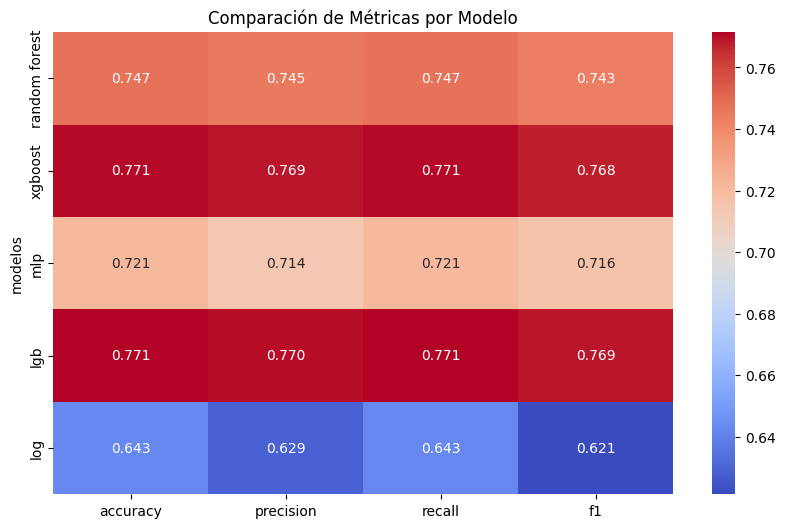

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Configurar el índice como 'modelos' para que aparezca en el eje y del heatmap
metricas_cluster.set_index('modelos', inplace=True)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metricas_cluster, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Comparación de Métricas por Modelo')
plt.show()

#Prueba

In [78]:
# Cargar el archivo CSV
df_test = pd.read_csv('ObesityTest.csv')

# Mostrar las primeras filas del dataframe
print(df_test.head())

      id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportatio

In [79]:
X_prueba = df_test.drop(columns="NObeyesdad")
y_prueba = df_test['NObeyesdad']

KeyError: "['NObeyesdad'] not found in axis"